In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
airline = pd.read_csv('international-airline-passengers.csv', names=['Month', 'Passengers'], header=0)
car = pd.read_csv('monthly-car-sales-in-quebec-1960.csv')
sales = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')

In [3]:
airline.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Month       145 non-null    object 
 1   Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.4+ KB


In [4]:
print(airline['Passengers'].mode()[0])
print(airline['Passengers'].mean())
print(airline['Passengers'].median())
print(np.std(airline['Passengers'], ddof=1))
print(airline['Passengers'].value_counts().head(5))

229.0
280.2986111111111
265.5
119.96631694294321
Passengers
229.0    3
306.0    2
405.0    2
242.0    2
196.0    2
Name: count, dtype: int64


In [5]:
airline['Passengers'] = airline['Passengers'].fillna(airline['Passengers'].mean())

In [6]:
dict_series = {
    'International airline passengers: monthly totals in thousands': airline['Passengers'],
    'Monthly car sales in quebec': car['Count'],
    'Monthly sales of company x': sales['Count']
    }

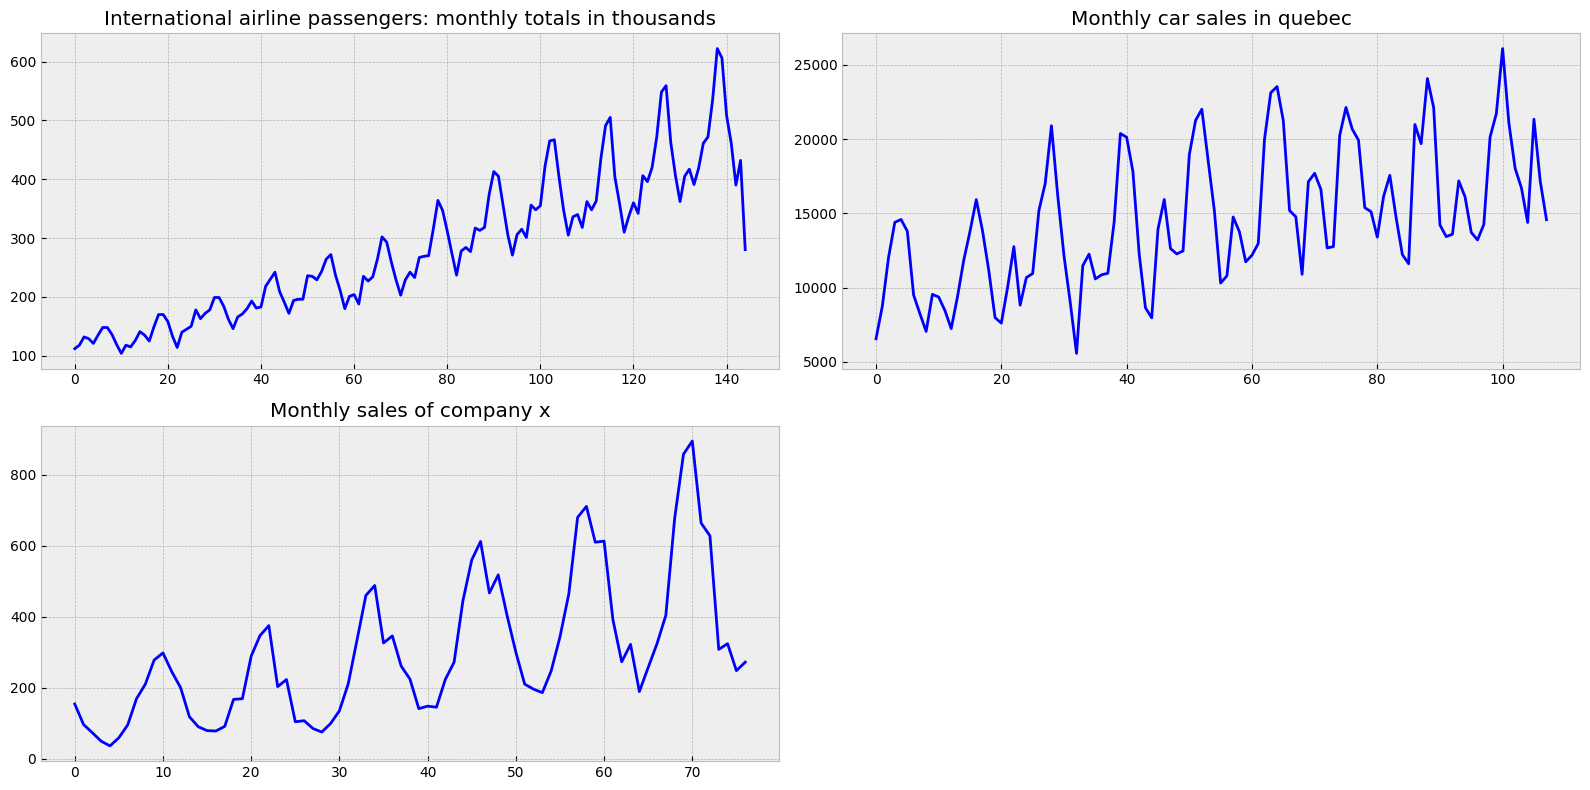

In [7]:
# Изначальные ряды
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (2, 2)
    for i, key in enumerate(dict_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        dict_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [8]:
# Нормализация дисперсии
from scipy.stats import boxcox

series1 = pd.Series(boxcox(dict_series['International airline passengers: monthly totals in thousands'], 0))
series2 = pd.Series(boxcox(dict_series['Monthly car sales in quebec'], 0))
series3 = pd.Series(boxcox(dict_series['Monthly sales of company x'], 0))

dict_series1 = {
    'International airline passengers: monthly totals in thousands': series1,
    'Monthly car sales in quebec': series2,
    'Monthly sales of company x': series3
    }

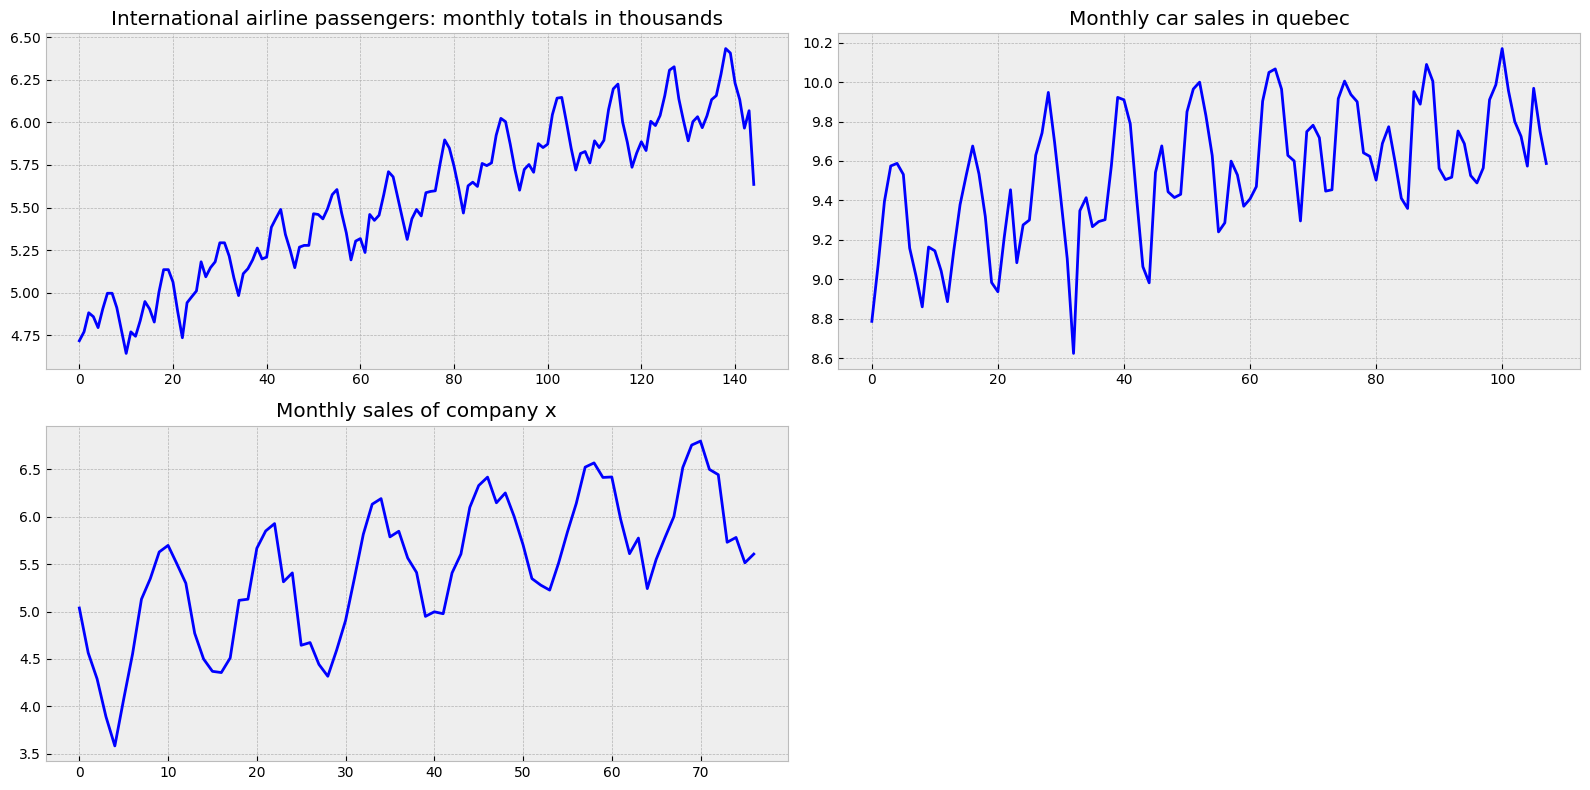

In [9]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (2, 2)
    for i, key in enumerate(dict_series1.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        dict_series1[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [10]:
# Дифференцируем
series1_1 = pd.Series(np.diff(series1, 1))
series2_2 = pd.Series(np.diff(series2, 1))
series3_3 = pd.Series(np.diff(series3, 1))

dict_series2 = {
    'International airline passengers: monthly totals in thousands': series1_1,
    'Monthly car sales in quebec': series2_2,
    'Monthly sales of company x': series3_3
    }

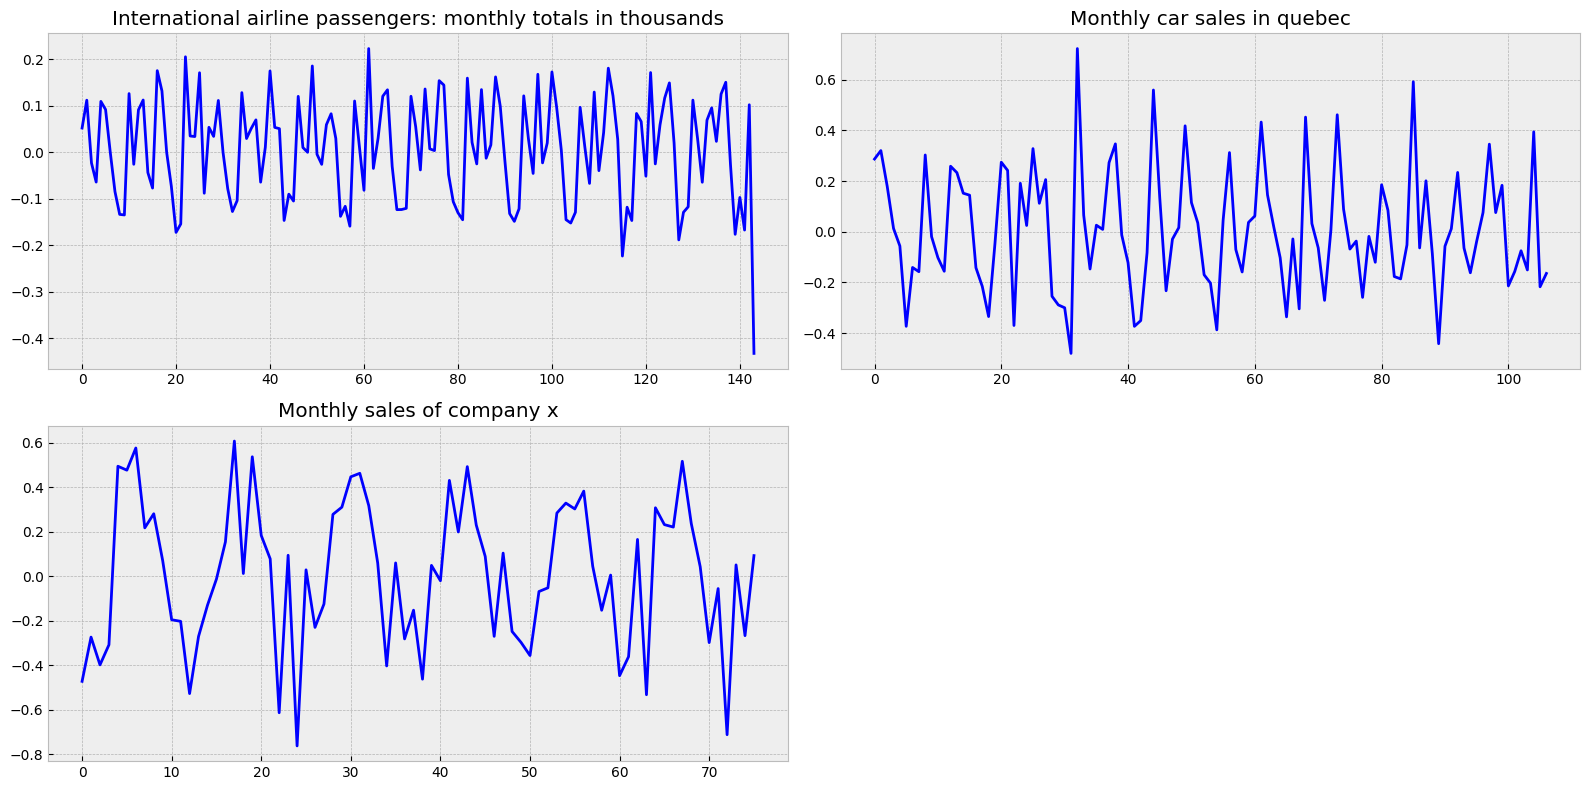

In [11]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (2, 2)
    for i, key in enumerate(dict_series2.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        dict_series2[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

In [12]:
# Проведем тест Тест Дики-Фуллера 
from statsmodels.tsa.stattools import adfuller

In [13]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [20]:
test_stationarity(series1_1)

Results of Dickey-Fuller Test:
Test Statistic                  -1.612910
p-value                          0.476448
#Lags Used                      12.000000
Number of Observations Used    131.000000
Critical Value (1%)             -3.481282
Critical Value (5%)             -2.883868
Critical Value (10%)            -2.578677
dtype: float64


In [21]:
test_stationarity(series2_2)

Results of Dickey-Fuller Test:
Test Statistic                 -4.193835
p-value                         0.000675
#Lags Used                     12.000000
Number of Observations Used    94.000000
Critical Value (1%)            -3.501912
Critical Value (5%)            -2.892815
Critical Value (10%)           -2.583454
dtype: float64


In [22]:
test_stationarity(series3_3)

Results of Dickey-Fuller Test:
Test Statistic                 -3.135644
p-value                         0.024025
#Lags Used                     11.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


### Если основываться на значениях p-value и визуальном анализе графиков, 2 и 3 график нам удалось сделать стационарными. p-value<0.05 - признак стационарности. Визуальная оценка, на мой взгляд, такова: 2-й и 3-й графики похожи на стационарный на стационраный - есть плоский шум без особых паттернов (3-й имеет чуть большую сезонность), а на 1-ом есть сезонность с шумами, нет циклов, и внизу резий спад.